<a href="https://colab.research.google.com/github/ericwarren9/ST-590/blob/main/Warren_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 590 Homework 4 By: Eric Warren

## Summarizing Student Data Numerically

### Reload Past Code From Homework 3

Here we are going to copy in our code from Homework 3 that will let us read in the data and some of the summaries we did. In statistics, we call this Exploratory Data Analysis.

For this part, we'll use the StudentData.txt data that comes from the UCI machine learning repository.

#### Read in the data

Read this dataset from the URL. Check out the first
few observations of the data. We will save our data as `student_data_math` since we are only looking at the math scores. The delimiter is ";".

In [197]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_data_math = pd.read_csv("student-mat.csv", sep = ";") # Read in data

student_data_math.head() # Show first couple of observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Summarize the Data

This data has many categorical variables and a few numeric. We are going to analyze it in the following subsections.

##### Categorical Variables

Create a one-way contingency table, a two-way contingency table, and a three-way contingency table. Interpret a number from each resulting table (that is, pick out a value produced and explain what that value means.)

First we will look at the one-way table. We are going to look at the number of each sex of student.

In [198]:
student_data_math.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

From here, we can see that we have slightly more females with them outnumbering the number of male students by 208 to 187.

Now we are going to look at a two way contingency table looking at the sex of a student and their family size.

In [199]:
pd.crosstab(student_data_math.sex,
            student_data_math.famsize)

famsize,GT3,LE3
sex,,
F,156,52
M,125,62


There are a couple things to note. The first is that most students have a family size greater than 3, meaning that on top of their parents they have at least one other sibling. The second thing to note is that it seems the proportion of male students might be only children (or have family sizes less than or equal to 3) than their female counterparts.

Now we are going to look at a three way contingency table looking at the sex of a student, their family size, and school.

In [200]:
pd.crosstab([student_data_math.sex, student_data_math.famsize],
            student_data_math.school)

school        GP  MS
sex famsize         
F   GT3      139  17
    LE3       44   8
M   GT3      113  12
    LE3       53   9

On top of what we have seen before, we can clearly see that more math students go to Gabriel Pereira than Mousinho da Silveira being the other school. It seems like the proportion of male students to female students seem to be about the same at each school and same with the family sizes.

Create a conditional two-way table. That is, condition on one variable's setting and create a two-way
table.

First, by subsetting the data (say with .loc) and then creating the two-way table

In [201]:
# Subset the math students by only looking at GP school students
math_data_GP = student_data_math.loc[student_data_math['school'] == "GP"]

# Make two way table
pd.crosstab(math_data_GP.sex,
            math_data_GP.famsize)

famsize,GT3,LE3
sex,,
F,139,44
M,113,53


Next, by creating a three-way table and subsetting it (in our case by school "GP")

In [202]:
# Save three way table from before
my_three_way_table = pd.crosstab([student_data_math.sex,
                                  student_data_math.famsize],
                                 student_data_math.school)

# Now make a two way table by subsetting to only show females
my_three_way_table["GP"]

sex  famsize
F    GT3        139
     LE3         44
M    GT3        113
     LE3         53
Name: GP, dtype: int64

Now we are going to create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for the plots.

First we are going to make a stacked bar graph for exploring the family size of a student and their sex for students who go to Gabriel Pereira school.

<ipython-input-203-730012c0e4e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_data_GP['familySize'] = math_data_GP.famsize.astype("category")


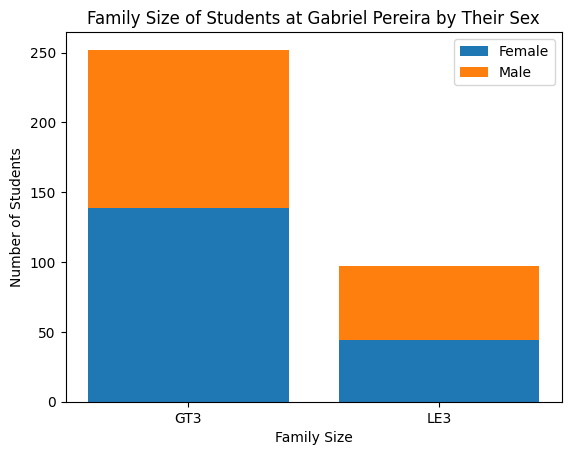

In [203]:
# Change family size variable to category
math_data_GP['familySize'] = math_data_GP.famsize.astype("category")

# Make table for data
stack_table = pd.crosstab(math_data_GP.familySize, math_data_GP.sex)

# Make the stacked bar plot
plt.bar(
  x = math_data_GP.familySize.cat.categories,
  height = stack_table.loc[:, "F"],
  label = "Female"
)
plt.bar(
  x = math_data_GP.familySize.cat.categories,
  height = stack_table.loc[:, "M"],
  bottom = stack_table.loc[:, "F"],
  label = "Male"
)
plt.xlabel("Family Size")
plt.ylabel("Number of Students")
plt.title("Family Size of Students at Gabriel Pereira by Their Sex")
plt.legend(loc = 0)

As we can see in this plot, it seems that the family sizes are fairly split by sex with each color representing about 50% of each bar. We can also see that at Gabriel Pereira there are way more students with a family size greater than 3.

Now we are going to look at a side by side plot with the same features of looking at the family size of students by sex at Gabriel Pereira.

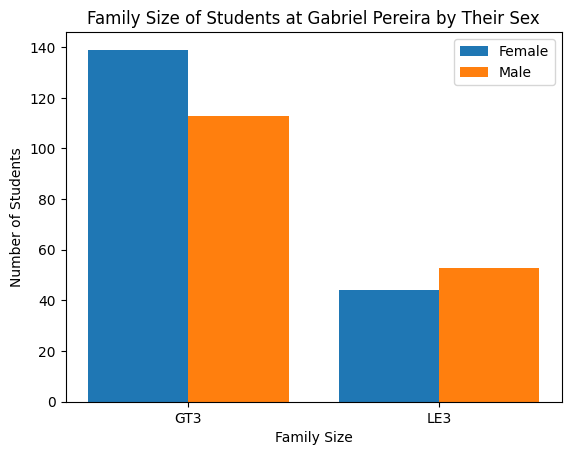

In [204]:
plt.bar(
  x = [1, 2],
  height = stack_table.loc[:, "F"],
  width = 0.4,
  label = "Female")
plt.bar(
  x = [1.4, 2.4],
  height = stack_table.loc[:, "M"],
  width = 0.4,
  label = "Male")
plt.xticks([1.2, 2.2], math_data_GP.familySize.cat.categories)
plt.xlabel("Family Size")
plt.ylabel("Number of Students")
plt.title("Family Size of Students at Gabriel Pereira by Their Sex")
plt.legend(loc = 0)

We can see in this plot how the family size of males and females in general tend to be greater than 3 at Gabriel Pereira. However, we can see that there are less males with family sizes being bigger (and as a result more males with smaller family sizes). This could give us the idea that females are more likely to have larger families than males (obviously we would have to do testing to confirm this).

##### Numeric variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

Find measures of center and spread for three of these variables (including G3 as one of them). Here we are going to look at centers (mean and median) and spread (being standard deviation) of three of the numeric variables being age, G1, and G3.

In [205]:
student_data_math[['age', 'G1', 'G3']].agg(["mean", "median", "std"])

,age,G1,G3
mean,16.696203,10.908861,10.415190
median,17.000000,11.000000,11.000000
std,1.276043,3.319195,4.581443


Now we are going to repeat while subsetting the data by some grouping variable (in this case we will look at the just female students)

In [206]:
student_data_math[['age', 'G1', 'G3']] \
.loc[student_data_math['sex'] == "F"] \
.agg(["mean", "median", "std"])

,age,G1,G3
mean,16.730769,10.620192,9.966346
median,17.000000,10.000000,10.000000
std,1.201696,3.232530,4.622338


Find measures of center and spread across a single grouping variable (in this case we will look at it by sex) for three of these variables (including G3 as one of them). Here we are going to look at centers (mean and median) and spread (being standard deviation) of three of the numeric variables being age, G1, and G3.

In [207]:
student_data_math.groupby('sex')[['age', 'G1', 'G3']].agg(["mean", "median", "std"])

age                          G1                          G3         \
          mean median       std       mean median       std       mean median   
sex                                                                             
F    16.730769   17.0  1.201696  10.620192   10.0  3.232530   9.966346   10.0   
M    16.657754   16.0  1.356181  11.229947   11.0  3.392839  10.914439   11.0   

               
          std  
sex            
F    4.622338  
M    4.495297

Here we can see how Male students might do a little better on their math scores despite seeming to be a little younger in age.

Find measures of center and spread across two grouping variables (sex and school) for three of these variables (including G3 as one of them). Here we are going to look at centers (mean and median) and spread (being standard deviation) of three of the numeric variables being age, G1, and G3.

In [208]:
student_data_math \
.groupby(['sex', 'school'])[['age', 'G1', 'G3']] \
.agg(["mean", "median", "std"])

age                          G1                          G3  \
                 mean median       std       mean median       std       mean   
sex school                                                                      
F   GP      16.579235   16.0  1.173426  10.579235   10.0  3.154102   9.972678   
    MS      17.840000   18.0  0.746101  10.920000   11.0  3.817940   9.920000   
M   GP      16.457831   16.0  1.263005  11.337349   11.0  3.458068  11.060241   
    MS      18.238095   18.0  0.995227  10.380952   10.0  2.747293   9.761905   

                             
           median       std  
sex school                   
F   GP       11.0  4.604622  
    MS       10.0  4.846992  
M   GP       11.0  4.594725  
    MS       10.0  3.491486

It is interesting to see that Male students at Gabriel Pereira seem to have higher test scores than other groups. It is also worth to note that the older students tend to go to Mousinho da Silveira.

Create a correlation matrix between all of the numeric variables

In [209]:
student_data_math.corr()

<ipython-input-209-a0f8682ae6ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_data_math.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Now let us create the correlation matrix for just the variables we explored before. Those variables are age, absences, and the three test grades variables (G1, G2, and G3).

In [210]:
student_data_math[['age', 'absences', 'G1', 'G2', 'G3']].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


We can see that there is high correlation between all the grade variables, but otherwise weak correlation seems to exist.

Here we are going to create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles. In this case, we are going to look at the final grades (G3) with the grouping variable sex and we are also going to look at absences with the grouping variable sex to see if there is a relationship with the sex of a student and what their final grades were (or how often they missed school).

First we are going to look at a histogram of the final grades (G3) compared to sex of a student.

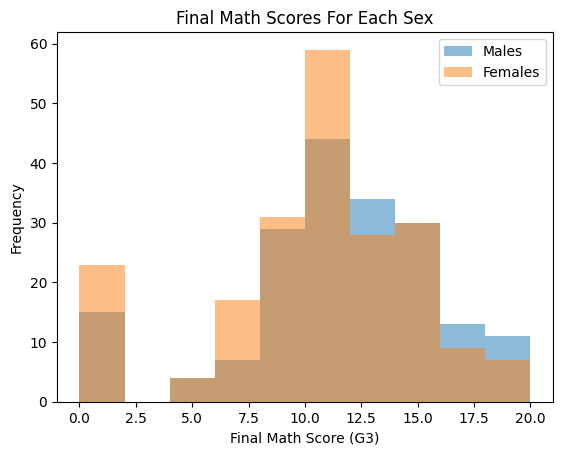

In [211]:
g3_male = student_data_math.loc[student_data_math.sex == "M", "G3"] #series for male final grades
g3_female = student_data_math.loc[student_data_math.sex == "F", "G3"] #series for female final grades

# Set up bin values
bin_ends = 10
bins = [i * max(student_data_math.G3) / bin_ends for i in range(0, bin_ends + 1)]

g3_male.plot.hist(bins = bins,
                  alpha = 0.5,
                  label = "Males",
                  title = "Final Math Scores For Each Sex").set(xlabel = "Final Math Score (G3)")
g3_female.plot.hist(bins = bins, alpha = 0.5, label = "Females")
plt.legend()

From this plot, we can get the idea that males might tend to perform a little better since there are more female math scores that are lower than males who seem to have a higher distribution of higher math scores.

Let us take a look to see if a Kernel density plot can depict this message more clearly.

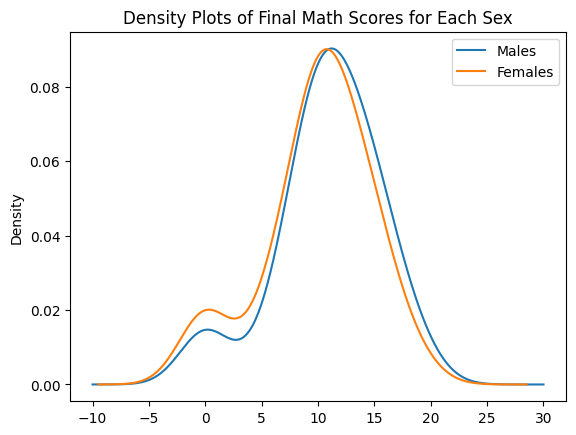

In [212]:
g3_male.plot.density(bw_method = 0.5,
                     label = "Males",
                     title = "Density Plots of Final Math Scores for Each Sex")
g3_female.plot.density(bw_method = 0.5,
                       label = "Females")
plt.legend()

From our density plot, this makes it look as if the final math scores between both sexes is about the same with males having slightly higher scores. This difference was not highlighted as much as it was in the histogram.

Let us take a look at a side-by-side boxplot of each sex's final math scores to see if there really is a difference.

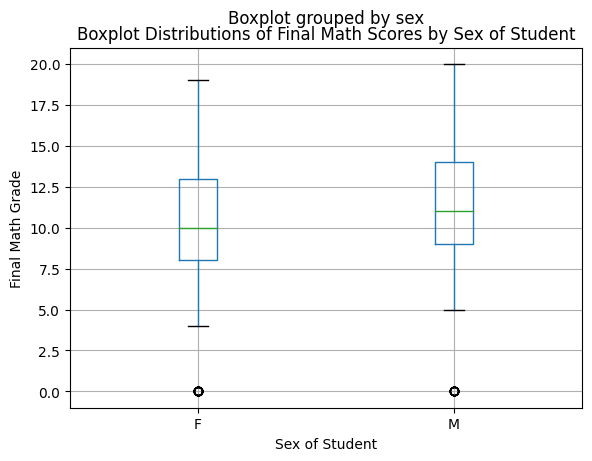

In [213]:
student_data_math.boxplot(column = ["G3"], by = "sex")
plt.title("Boxplot Distributions of Final Math Scores by Sex of Student")
plt.xlabel("Sex of Student")
plt.ylabel("Final Math Grade")
plt.show()

Here we can see that it seems that males do slightly better than females as all of the 5 major quantiles (minimum, Q1, median, Q3, and maximum) are all higher for males. This seems to be fairly close but by initial exploratory analysis we can say that males had a better final math score than females. Obviously, we need to do more statistical testing to make sure this statement is actually true.

Now we are going to look at if there is a difference in absences from math class and the sex of a student to see if there is a relationship there. First we are going to look at a histogram of the absences compared to sex of a student.

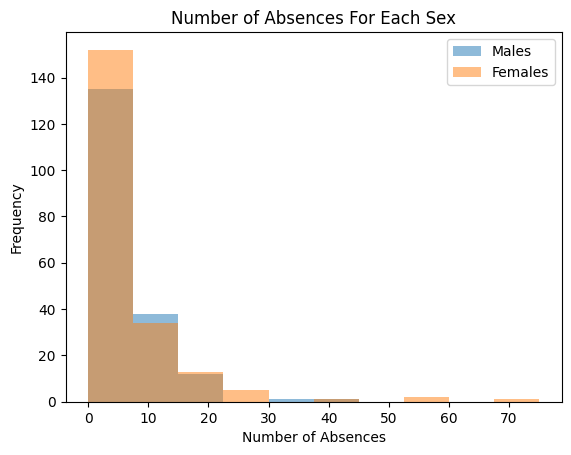

In [214]:
absences_male = student_data_math.loc[student_data_math.sex == "M", "absences"] #series for male absences
absences_female = student_data_math.loc[student_data_math.sex == "F", "absences"] #series for female absences

# Set up bin values
bin_ends = 10
bins = [i * max(student_data_math.absences) / bin_ends for i in range(0, bin_ends + 1)]

absences_male.plot.hist(bins = bins,
                             alpha = 0.5,
                             label = "Males",
                             title = "Number of Absences For Each Sex").set(xlabel = "Number of Absences")
absences_female.plot.hist(bins = bins, alpha = 0.5, label = "Females")
plt.legend()

The distribution of absences tends to be very skewed left. This is something to note since we usually assume normal distribtions in statistics. On top of that, we can see that males and females have a pretty similar breakdown of absences. Some of the higher outliers do tend to be females which is something to note.

Let us now take a look to see if a Kernel density plot of these measures to see if we can depict this message more clearly.

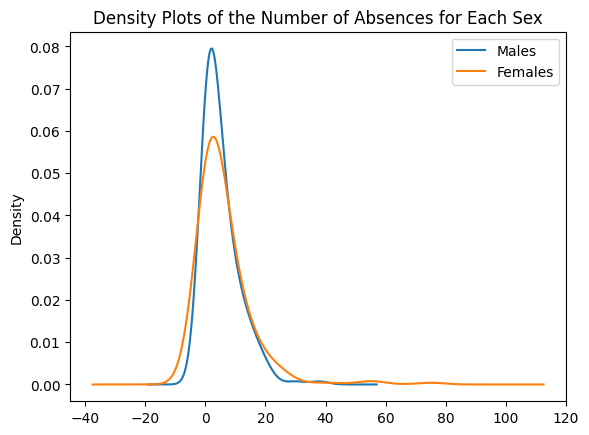

In [215]:
absences_male.plot.density(bw_method = 0.5,
                           label = "Males",
                           title = "Density Plots of the Number of Absences for Each Sex")
absences_female.plot.density(bw_method = 0.5,
                             label = "Females")
plt.legend()

Other than similarities in shape and depicted means, we can see that the absences tails for females seems to be heavier than males. This means that even though we might expect the averages to be about the same, there is more variation in female students on if they skip math class at school more. The lower peak for the female density plot confirms this suspicion.

Lastly, let us take a look at a side-by-side boxplot of each sex's absence totals in math class to see if there really is a difference that we are suspecting.

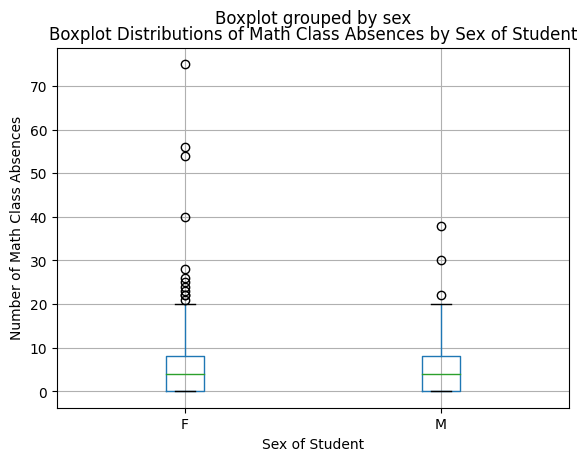

In [216]:
student_data_math.boxplot(column = ["absences"], by = "sex")
plt.title("Boxplot Distributions of Math Class Absences by Sex of Student")
plt.xlabel("Sex of Student")
plt.ylabel("Number of Math Class Absences")
plt.show()

The distributions and five number summaries of each tend to be about the same. The only major difference is how there are way more outliers for female students, meaning the maximum is higher, but also we are more likely to have a high absent math student be a female than male. It is also interesting to think about if the higher absence total in females is causing the lowe final math scores that we saw before.

We are now going to create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.

The first plot we are going to look at is the final math score (G3) compared to absences we saw before with the grouping variable sex. Will there be any associations we can find?

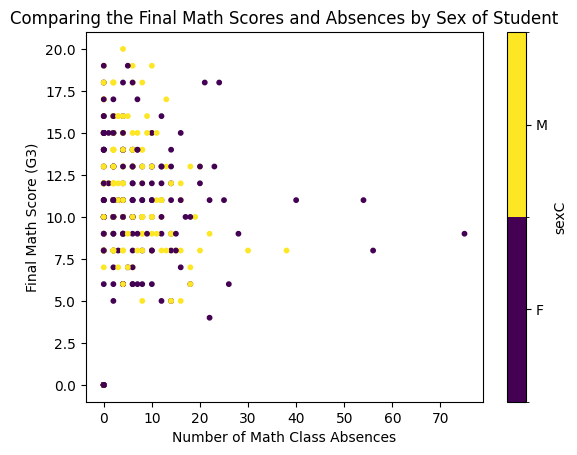

In [217]:
# Change sex variable to category
student_data_math['sexC'] = student_data_math.sex.astype("category")

student_data_math.plot.scatter(x = "absences",
                               y = "G3",
                               c = "sexC",
                               cmap = "viridis",
                               s = 10)
plt.title("Comparing the Final Math Scores and Absences by Sex of Student")
plt.xlabel("Number of Math Class Absences")
plt.ylabel("Final Math Score (G3)")
plt.show()

As much as we might want to find a relationship, this scatterplot makes it seem like there is not any kind of relationship between less absences and higher final math scores. We can see the high absence students tend to be females but other than that it seems like males and females tend to be pretty similar.

The last plot we are going to look at is the final math score (G3) compared to absences we saw before but this time with the grouping variable family size. Will there be any associations we can find? Will family size determine how well a student might do?

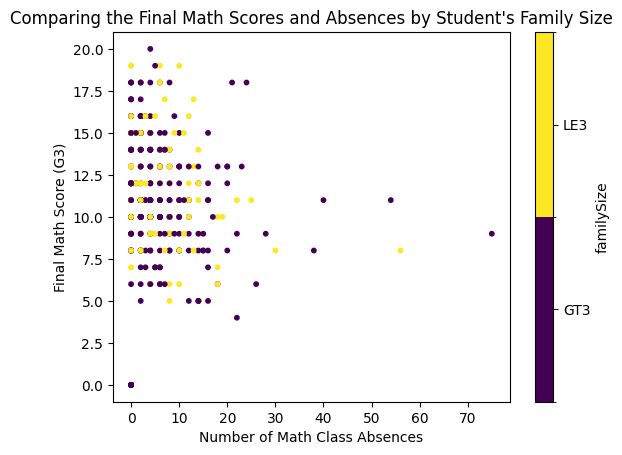

In [218]:
# Change family size variable to category
student_data_math['familySize'] = student_data_math.famsize.astype("category")

student_data_math.plot.scatter(x = "absences",
                               y = "G3",
                               c = "familySize",
                               cmap = "viridis",
                               s = 10)
plt.title("Comparing the Final Math Scores and Absences by Student's Family Size")
plt.xlabel("Number of Math Class Absences")
plt.ylabel("Final Math Score (G3)")
plt.show()

So again we can see there is not much relationship between absences and final math scores. However, we can see here that larger family size students tend to miss more math classes and smaller family size students with most of the larger values being greater than 3 family size. Is this because of more family vacations? After all this analysis it might be random if a student does well in math or not as we have not found any substantial trends in the data yet.

## Plotting NFL Data

For this part we'll read in the NFL Box Score data that we read in class videos. [The data is available here.](https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv)

### Task 1: Read in Data

We will read this dataset from the URL. Check out the
first few observations of the data.

In [219]:
# Read in data
nfl_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")

# Look at first few observations
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


Now, convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category type variables.

In [220]:
# Change home team variable to category
nfl_data['homeTeamC'] = nfl_data.homeTeam.astype("category")

# Change away team variable to category
nfl_data['awayTeamC'] = nfl_data.awayTeam.astype("category")

# Change day variable to category
nfl_data['dayC'] = nfl_data.day.astype("category")

# Change stadium variable to category
nfl_data['stadiumC'] = nfl_data.stadium.astype("category")

# Change start time variable to category
nfl_data['startTimeC'] = nfl_data.startTime.astype("category")

# Change toss variable to category
nfl_data['tossC'] = nfl_data.toss.astype("category")

# Change roof variable to category
nfl_data['roofC'] = nfl_data.roof.astype("category")

# Change surface variable to category
nfl_data['surfaceC'] = nfl_data.surface.astype("category")

### Task 2: Summarize the Data

We should remove any data where the week is not 1 through 17.

In [221]:
# Check out our current data for what to remove
nfl_data

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,HminusAScore,homeSpread,homeTeamC,awayTeamC,dayC,stadiumC,startTimeC,tossC,roofC,surfaceC
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-3,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,-6,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-6,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,8,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,Division,11-Jan,Sun,2014,Indianapolis Colts,0,14,7,3,-1,...,-11,7.0,Denver Broncos,Indianapolis Colts,Sun,Sports Authority Field at Mile High,4:40pm,Broncos (deferred),outdoors,grass
3467,Division,11-Jan,Sun,2014,Dallas Cowboys,7,7,7,0,-1,...,5,6.0,Green Bay Packers,Dallas Cowboys,Sun,Lambeau Field,1:05pm,Cowboys,outdoors,grass
3468,ConfChamp,18-Jan,Sun,2014,Green Bay Packers,13,3,0,6,0,...,6,8.5,Seattle Seahawks,Green Bay Packers,Sun,CenturyLink Field,3:06pm,Seahawks,outdoors,fieldturf
3469,ConfChamp,18-Jan,Sun,2014,Indianapolis Colts,0,7,0,0,-1,...,38,7.0,New England Patriots,Indianapolis Colts,Sun,Gillette Stadium,6:50pm,Patriots (deferred),outdoors,fieldturf


So we need to remove these playoff rounds

In [222]:
# Convert week to numeric for filter
nfl_data['week'] = pd.to_numeric(nfl_data['week'], errors='coerce')

# Do filter for regular season
nfl_reg_season = nfl_data[(nfl_data['week'] >= 1) & (nfl_data['week'] <= 17)]

# convert week back to string since it is a factor not numeric data
nfl_reg_season['week'] = nfl_reg_season['week'].astype(int).astype(str)

# Show filtered data removing playoff rounds
nfl_reg_season

<ipython-input-222-17377b1fd104>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_reg_season['week'] = nfl_reg_season['week'].astype(int).astype(str)


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,HminusAScore,homeSpread,homeTeamC,awayTeamC,dayC,stadiumC,startTimeC,tossC,roofC,surfaceC
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-3,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,-6,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-6,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,8,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,17,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,4,7.0,Minnesota Vikings,Chicago Bears,Sun,TCF Bank Stadium,1:02pm,Vikings (deferred),outdoors,fieldturf
3456,17,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,12,2.5,Kansas City Chiefs,San Diego Chargers,Sun,Arrowhead Stadium,1:03pm,Chiefs (deferred),outdoors,grass
3457,17,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,33,14.0,Denver Broncos,Oakland Raiders,Sun,Sports Authority Field at Mile High,4:25pm,Broncos (deferred),outdoors,grass
3458,17,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,-17,-7.5,Tennessee Titans,Indianapolis Colts,Sun,LP Field,1:02pm,Titans,outdoors,grass


Now that we have the regular season data that we should be analyzing we will summarize some of the variables grouped by season and week, season alone, and week alone (the three different scenarios).

Let us first look at the median and mean for the home minus away score variable for each season.

In [223]:
# Get values by season
points_spread_season = nfl_reg_season \
.groupby("season") \
.agg(med_home_differential = ("HminusAScore", "median"),
     mean_home_differential = ("HminusAScore", "mean")
     )

# Make dataframe
points_spread_season = pd.DataFrame(points_spread_season)

points_spread_season

,med_home_differential,mean_home_differential
season,,
2002,3.0,2.246094
2003,3.0,3.554688
2004,3.0,2.507812
2005,3.0,3.648438
2006,2.0,0.847656
2007,3.0,2.867188
2008,3.0,2.558594
2009,3.0,2.207031
2010,3.0,1.894531


Now let us plot the means and medians we showed above for the score differential over the course of the seasons.

<Axes: title={'center': 'Home Field Advantage Trends of Each NFL Season'}, xlabel='NFL Season', ylabel='Point Differential in Favor of Home Team'>

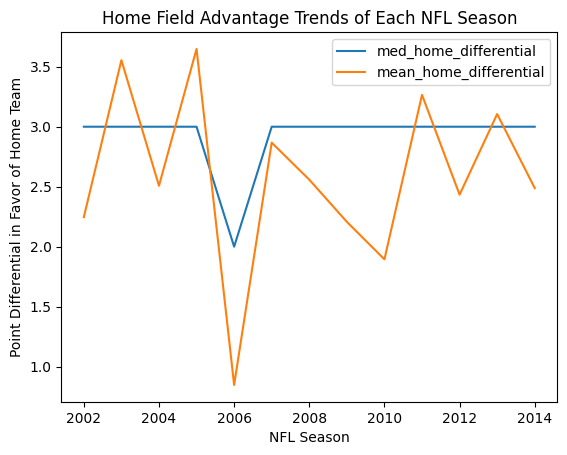

In [224]:
points_spread_season.plot.line(title = "Home Field Advantage Trends of Each NFL Season",
                               ylabel = "Point Differential in Favor of Home Team",
                               xlabel = "NFL Season")

As we can see home field advantage has existed throughout the NFL season. However, we can see a huge drop in 2006 with home field advantage disappearing.

Let us first look at the median and mean for the home minus away score variable for each week of a season.

In [225]:
# Get values by week of season
points_spread_week = nfl_reg_season \
.groupby("week") \
.agg(med_home_differential = ("HminusAScore", "median"),
     mean_home_differential = ("HminusAScore", "mean")
     )

# Make dataframe
points_spread_week = pd.DataFrame(points_spread_week)

# Make week a numeric variable for ordering purposes
points_spread_week = points_spread_week.loc[sorted(points_spread_week.index, key = lambda x: int(x))]

points_spread_week

,med_home_differential,mean_home_differential
week,,
1,3.0,2.423077
2,3.0,3.294686
3,3.0,1.878788
4,3.0,3.108696
5,3.0,3.796703
6,3.0,2.309392
7,3.0,2.227778
8,4.0,3.207865
9,2.0,0.112360


We can see here that the end of the year weeks (weeks 14 and 17) seem to have the most home field advantage in scoring difference. This is when a team is making a playoff push so they are trying to get over the top in the end points of the season.

Now let us plot the means and medians we showed above for the score differential over the course of the weeks of the seasons.

<Axes: title={'center': 'Home Field Advantage Trends of Each NFL Week of a Season'}, xlabel='NFL Week of the Particular Season', ylabel='Point Differential in Favor of Home Team'>

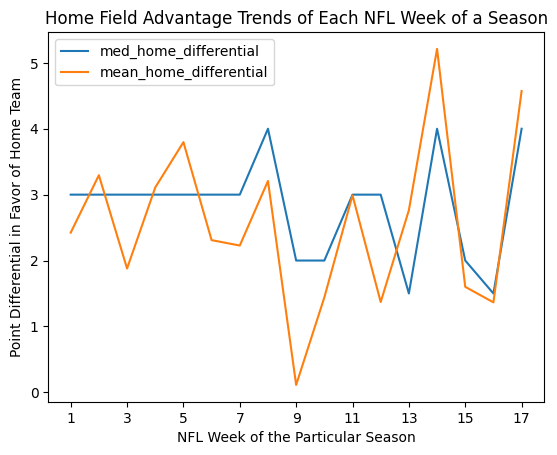

In [226]:
points_spread_week.plot.line(title = "Home Field Advantage Trends of Each NFL Week of a Season",
                             ylabel = "Point Differential in Favor of Home Team",
                             xlabel = "NFL Week of the Particular Season")

It is interesting to see how week 9 (at the middle of the year is the worst week for home teams) and how at the end of the year there is that push to get into the playoffs for home teams performing well.

Let us first look at the median and mean for the home minus away score variable for each week of each season. So week 1 of 2002 season, week 2 of 2002 season, and week 1 of 2003 season are all different variables.

In [227]:
points_spread_season_week2 = pd.pivot_table(nfl_reg_season,
                                          values = ["HminusAScore", "homeSpread"],
                                          index = ["season", "week"],
                                          aggfunc = ["mean", "median"])

# Make dataframe
points_spread_season_week2 = pd.DataFrame(points_spread_season_week2)

# Make week a numeric variable for ordering purposes
points_spread_season_week2 = points_spread_season_week2.loc[sorted(points_spread_season_week2.index, key = lambda x: (int(x[0]), int(x[1])))]

points_spread_season_week2

mean                  median           
            HminusAScore homeSpread HminusAScore homeSpread
season week                                                
2002   1        3.000000   1.437500          3.0       2.00
       2       -4.500000   2.531250         -6.5       3.25
       3        4.857143   2.964286          3.0       5.75
       4        9.357143   1.857143          9.0       3.00
       5       -0.785714   2.821429         -3.5       3.00
...                  ...        ...          ...        ...
2014   13       6.625000   2.156250          3.0       3.00
       14      -7.312500   1.000000         -9.5      -2.25
       15       0.437500   3.437500          2.0       3.75
       16       0.062500  -1.875000          2.0      -1.00
       17      -0.312500   4.343750          3.5       6.50

[221 rows x 4 columns]

Again we can see the disasterous start to the 2006 season for the home teams. This might be a trend to monitor. Also we can see how the point spreads are similar to those of the results but there are some weeks where it is not overly close. Notice how the home teams are favored most weeks.

Now let us plot the means and medians we showed above for the score differential over the course of the weeks of each of the seasons. Thus we will look at 2002 season week 1, 2002 season week 2, ..., until 2014 season of week 17.

<Axes: title={'center': 'Home Field Advantage Trends of Each NFL Week of a Season'}, xlabel='NFL Season and Week of the Particular Season', ylabel='Point Differential in Favor of Home Team'>

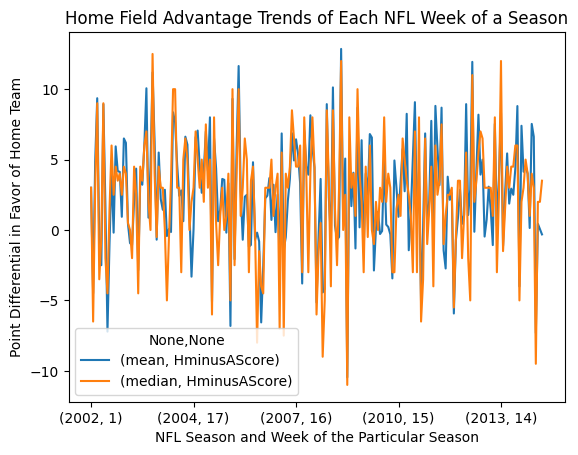

In [228]:
# Make data for graph
points_spread_season_week = pd.pivot_table(nfl_reg_season,
                                          values = "HminusAScore",
                                          index = ["season", "week"],
                                          aggfunc = ["mean", "median"])

# Make dataframe
points_spread_season_week = pd.DataFrame(points_spread_season_week)

# Make week a numeric variable for ordering purposes
points_spread_season_week = points_spread_season_week.loc[sorted(points_spread_season_week.index, key = lambda x: (int(x[0]), int(x[1])))]

points_spread_season_week.plot.line(title = "Home Field Advantage Trends of Each NFL Week of a Season",
                                    ylabel = "Point Differential in Favor of Home Team",
                                    xlabel = "NFL Season and Week of the Particular Season")

From this we can see that the mean and median home point differentials are usually about the same most weeks (we can see some weeks with outliers like in the later seasons) and it also shows with constant positive and negative values that this could be a hard thing to estimate. If we were trying to predict a winner we might pick the home team due to past graphs and even this one seeming to "center" around maybe 2.5 or 3 but it was not as obvious as we thought before.

Now we are going to write at least one function that can be used to easily create a plot for this data. The function we are going to create will allow a user to decide what statistic(s) they would like to plot when looking at a line graph of either picking line plot of season, week, or both (as a list) and if they would like to see the mean, median, or both statistics (as a list) of the home point differential. We are going to write this function below.

In [229]:
# Write our function
def my_home_point_spread_display(index = 'season', stat = 'mean'):
  """
  Here for the index option we can put in "season", "week", or a list of "['season', 'week']"
  For the stat option we can input "mean", "median", or a list of "['mean', 'median']"
  Function will then go through and do the appropriate aggregate and will return a plot of what you want
  If there is an error you will get an error message saying the issue.
  """
  # Here we are going to make our aggregate data and put conditions for those to work.
  if (index == ['season', 'week']) | (index == 'season') | (index == 'week'):
    if (stat == ['mean', 'median']) | (stat == 'mean') | (stat == 'median'):
      points_spread = pd.pivot_table(nfl_reg_season,
                                     values = "HminusAScore",
                                     index = index,
                                     aggfunc = stat)

    # Print statements if value is not acceptable.
    else:
      print("Put in an acceptable stat value. Stat can be either 'mean', 'median', or ['mean', 'median'].")
  else:
    print("Put in an acceptable index value. Index can be either 'season', 'week', or ['season', 'week'].")

  # Turn data into a dataframe for plotting later
  try:
    points_spread = pd.DataFrame(points_spread)
  except UnboundLocalError:
    None

  # Make week a numeric variable for ordering purposes
  if index == ['season', 'week']:
    points_spread = points_spread.loc[sorted(points_spread.index, key = lambda x: (int(x[0]), int(x[1])))]
  else:
    try:
      points_spread = points_spread.loc[sorted(points_spread.index, key = lambda x: int(x))]
    except UnboundLocalError:
      None


  # Make if else for x label on plot
  if index == 'season':
    label_x = "NFL Season"
  elif index == 'week':
    label_x = "NFL Week of the All Seasons"
  elif index == ['season', 'week']:
    label_x = "NFL Season and Week of the Particular Season"
  else:
    None

  # Make if else for y label on plot
  if stat == ['mean', 'median']:
    label_y = "Point Differential in Favor of Home Team"
  elif stat == 'mean':
    label_y = "Mean Point Differential in Favor of Home Team"
  elif stat == 'median':
    label_y = "Median Point Differential in Favor of Home Team"
  else:
    None

  # Make line plot of what we wanted
  try:
    points_spread.plot.line(title = "Home Field Advantage Trends in the NFL",
                            ylabel = label_y,
                            xlabel = label_x)
    plt.legend(title = "Variable Looked At")
  except UnboundLocalError:
    print("Not a valid input for the index and/or stat variables. Please reference the doc string to see correct types or look at above printed message.")

Now we should try our variable with a variety of options. The first will be seeing if we put in the default options.

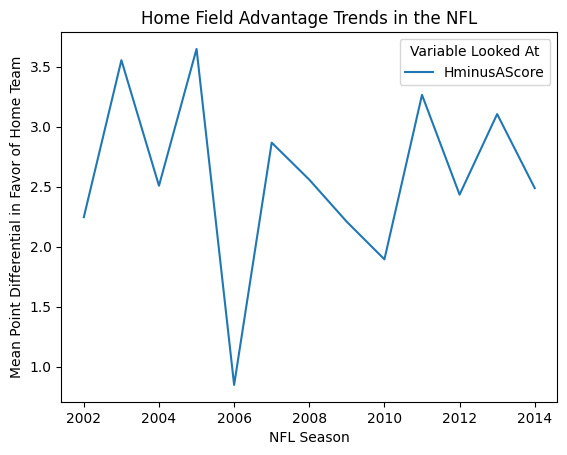

In [230]:
my_home_point_spread_display()

Here we can see that we get the average (mean) point home differentials by season. Again notice how 2006 is a lot lower than the others.

Next we will look at putting in one default (use season and put in stat of median).

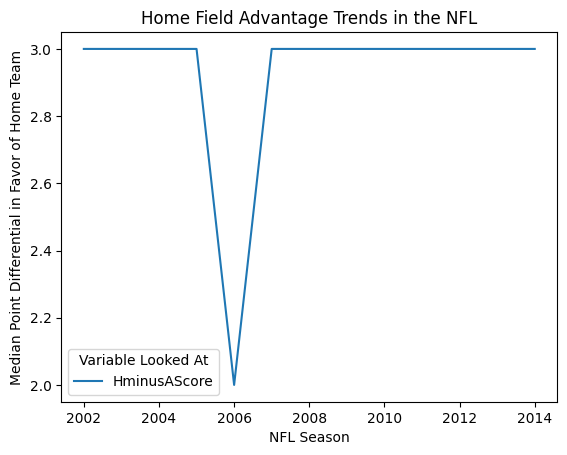

In [231]:
my_home_point_spread_display(stat = 'median')

Notice how the median point differentials are literally the same for all seasons but the 2006 season which was worse. This is something we can keep in mind if we want to predict a winner just based on location.

Now let us look at if we change the stat to both mean and median and still look at the week this time.

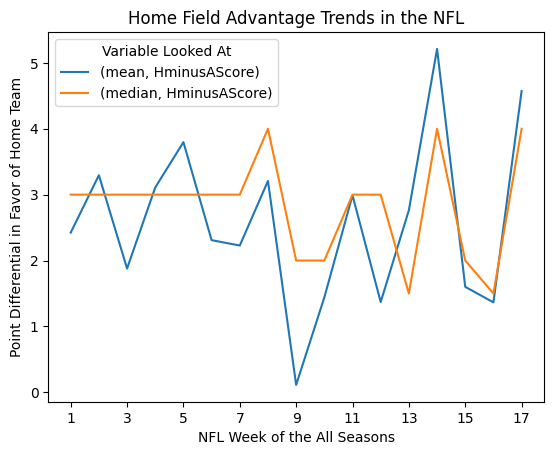

In [232]:
my_home_point_spread_display(index = 'week', stat = ['mean', 'median'])

We can see how the median and means after week 7 follows a similar trend. Also see how week 9 tends to be a rough stretch for the home teams. Lastly note how the median for the first 7 weeks is the same 3 point "home field advantage" a team gets and can become more in the later weeks (maybe snow or weather plays a factor).

Next let us take a look at the mean and medians of each NFL Season and Week combined.

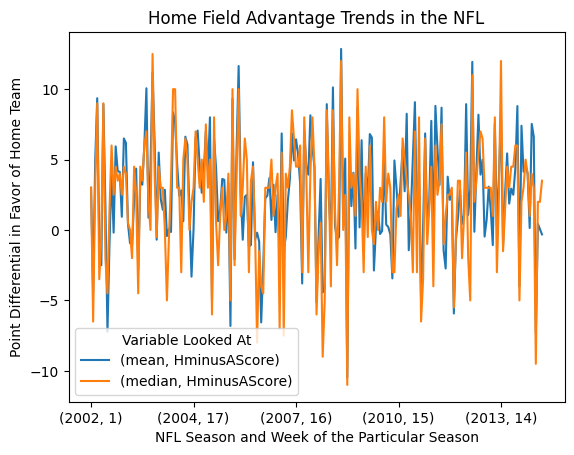

In [233]:
my_home_point_spread_display(index = ['season', 'week'], stat = ['mean', 'median'])

Again we can see this bouncing of point differentials ofr the home team which makes sense that this trend is random, meaning it might be hard to predict a winner and loser based off location. However, it does look to be centered around 3, which means we might be able to expect a team that is playing at home a roughly "3 point advantage" (or a field goal advantage) over an away team. However, note that the median and means are similar which means we do not have too many outliers causing difficulties in our analysis which means either statistical measurement should be fine to use to make exploratory data analysis arguments (typically we choose to use means).

Lastly, let us take a look at if we get an error and how the message can help us fix this.

In [234]:
my_home_point_spread_display(index = 'day', stat = 'mean')

Put in an acceptable index value. Index can be either 'season', 'week', or ['season', 'week'].
Not a valid input for the index and/or stat variables. Please reference the doc string to see correct types or look at above printed message.


Look at the message printed to us that allows us to make the necessary adjustments and fix our code. Now that you know the basic outline of the function, feel free to try it yourself and see how the home field advantage point differential is impacted based on the aspect of the NFL history you are looking at.